In [1]:
#credit card fraud detection
#dataset contains numerical values which are a result of PCA transformation
#PCA transformation is done coz data is secured and not sharable
#Class is the response variable and it takes value 1 in case of fraud and 0 otherwise
#we use isolation forest algorithm and local outlier factor algorithm

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

In [3]:
#loading the dataset
credit_fraud = pd.read_csv(r'C:\Users\Sumana bushireddy\Downloads\archive\creditcard.csv', sep=',')
credit_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#to get some info about the dataset
credit_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#checking for any null values
credit_fraud.isnull().values.any()

False

NameError: name 'LABELS' is not defined

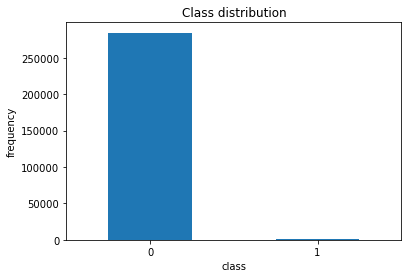

In [6]:
#finding number of classes
count_classes = pd.value_counts(credit_fraud['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title('Class distribution')
plt.xlabel('class')
plt.ylabel('frequency')
plt.xticks(range(2), LABELS)

In [7]:
#normal transaction are more than 250,000 and fraudelant transactions are so less


In [8]:
#now taking values 1 as fraud and 0 as normal
fraud = credit_fraud[credit_fraud['Class']==1]
normal = credit_fraud[credit_fraud['Class']==0]

In [9]:
#printing the size of fraud and normal
print(fraud.shape,normal.shape)
#492 are having fraud and 284315 are normal

(492, 31) (284315, 31)


In [10]:
#to analyze some more information from the transaction data
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
#this helps to see what amount is there for fraud dataset
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

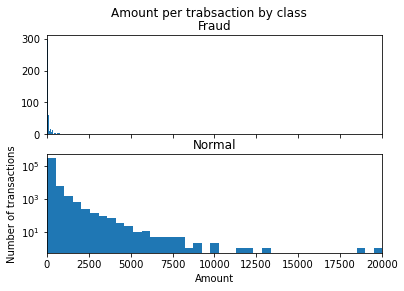

In [12]:
#using matplotlib to see the transactions
f, (ax1,ax2) = plt.subplots(2,1, sharex=True)
f.suptitle('Amount per trabsaction by class')
bins = 50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of transactions')
plt.xlim((0,20000))
plt.yscale('log')
plt.show()

In [13]:
#we see how transaction is there, for fraud it works with amount, which is very small
#whereas in normal we'll get it for big amounts

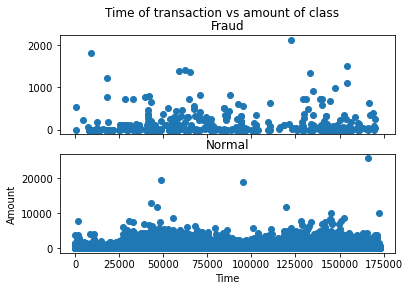

In [14]:
#now we'll see how many different transactions are there for fraud with respect to time
f, (ax1,ax2) = plt.subplots(2,1, sharex=True)
f.suptitle('Time of transaction vs amount of class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [15]:
#instead of taking whole data, we take a sample for reducing time during preprocessing
data1 = credit_fraud.sample(frac=0.1, random_state=1)
data1.shape

(28481, 31)

In [16]:
credit_fraud.shape

(284807, 31)

In [17]:
#we took 0.1% of the whole data
#now we should determine how many are fraud and how many normal from data1
Fraud = data1[data1['Class']==1]
Normal = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Normal))

In [18]:
#printing outlier fractions, normal and fraud cases
print(outlier_fraction)
print('Fraud cases : {}'.format(len(Fraud)))
print('Normal cases : {}'.format(len(Normal)))

0.0017234102419808666
Fraud cases : 49
Normal cases : 28432


In [19]:
#we should create independent and dependent features
#whereever column name is not given as class will be considered as independent featires and wherever there is class we take it as target 
columns=data1.columns.tolist()
#filtering the columns to remive data which we dont want
columns = [c for c in columns if c not in ['Class']]
#storing the variable that we r predicting
target = 'Class'
#defining the random state
state = np.random.RandomState(42)
X=data1[columns]
Y=data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
#printing the shapes of x and y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [20]:
#now we'll predict our model using isolation forest algorithm
#it is newest techniques to detect anomalities
#It isloates obsevation by randoms slelecting feature and then randomly selecting a split value 
#between maximum and minimum values of the selected feature
#it becomes easier coz only few conditions are needed to separate cases from the normal observations

#LOF algorithm is an unsupervised outlier detection method which computes the local density derivation of  agiven data point with respect to its neighbors
#it considers as outlier samples that have a substantially lower density than their neighbors


In [24]:
#defining the outlier detection methods
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
     max_iter=-1)
   
}
#n_estimator is a decision tree, no of smaple and all other info
#for lof, if density is >=20, it is considered as normal else fraud
#we are using minkowski metric
#svm works on creating decision boundary b/w points


In [25]:
type(classifiers)

dict

In [ ]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 73
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



In [ ]:
#isolation forst gave the best accuracy of 99.7 and local outlier factor gave an accuracy of 99.6%
#svm gives an accuracy of only 70% coz the dataset is unbalanced and unbalanced datasets work better only with Isolation forest and lof
